In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

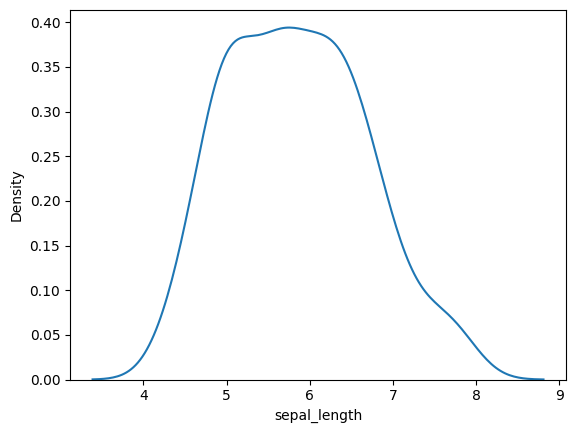

In [3]:
# Loading Dataset
df = sns.load_dataset('iris')
sns.kdeplot(df['sepal_length'])
plt.show()

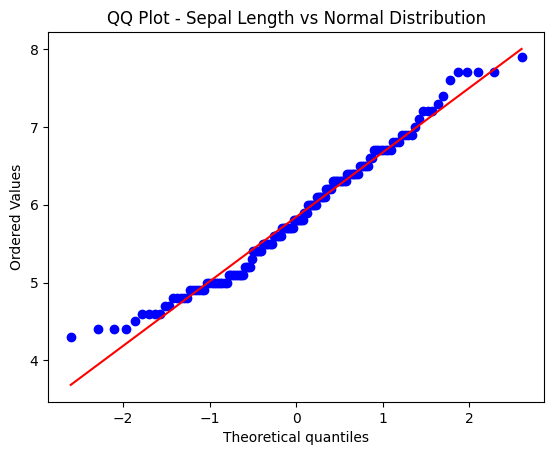

In [6]:
# Method 1: Using scipy.stats.probplot (recommended)
from scipy import stats
stats.probplot(df['sepal_length'], dist="norm", plot=plt)
plt.title("QQ Plot - Sepal Length vs Normal Distribution")
plt.show()

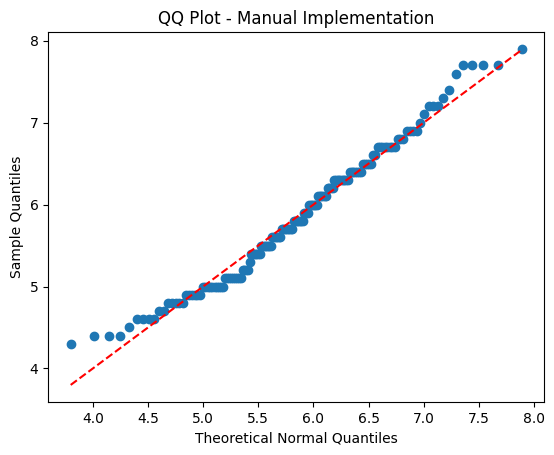

In [9]:
# Method 2: Manual implementation
n = len(df['sepal_length'])
sorted_data = np.sort(df['sepal_length'])

# Calculate theoretical quantiles from normal distribution
# with same mean and std as your data
sample_mean = np.mean(df['sepal_length'])
sample_std = np.std(df['sepal_length'])

# Create expected quantiles
p = np.arange(1, n+1) / (n+1)  # Percentile positions
theoretical_quantiles = stats.norm.ppf(p, loc=sample_mean, scale=sample_std) # Same mean and same std
# ppf -
'''
    Input: A probability (between 0 and 1)
    Output: The value (quantile) where that probability occurs in the normal distribution
    Normal Distribution Curve
        ^
        |
        |      /\
        |     /  \
        |    /    \
        |   /      \
        |  /        \
        | /          \
        +-------------> x
    PPF asks: "At what x-value does the area under the curve equal p?"
'''

plt.scatter(theoretical_quantiles, sorted_data)
plt.plot(
    [min(theoretical_quantiles), max(theoretical_quantiles)],
    [min(theoretical_quantiles), max(theoretical_quantiles)],
    'r--'
)
plt.xlabel('Theoretical Normal Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot - Manual Implementation')
plt.show()

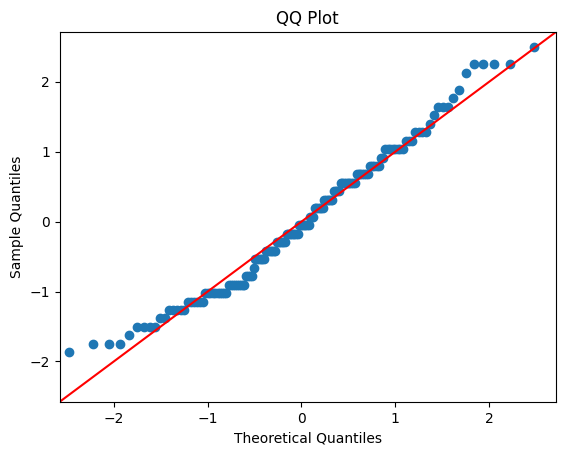

In [14]:
# using statsmodel
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

---

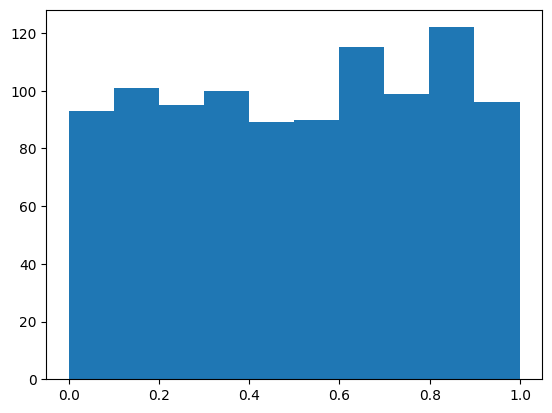

In [15]:
# Generate a set of random data
x = np.random.uniform(low=0, high=1, size=1000)
plt.hist(x)
plt.show()

In [16]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(x)
print(params[0], params[1])
dist = stats.uniform(loc=params[0], scale=params[1]) # With same parameter as input data

8.296459721379712e-05 0.9989987602835144


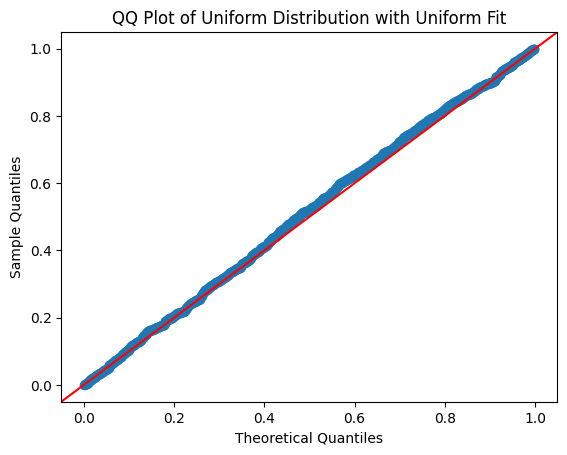

In [17]:
# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

---

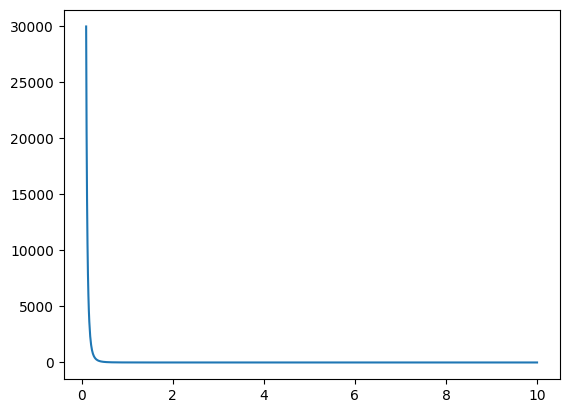

In [18]:
# Define the parameters of the Pareto distribution
alpha = 3
xm = 1

# Create an array of x values
x = np.linspace(0.1, 10, 1000)

# Calculate the y values of the Pareto distribution
y = alpha * (xm**alpha) / (x**(alpha+1))

# Plotting
plt.plot(x,y)
plt.show()

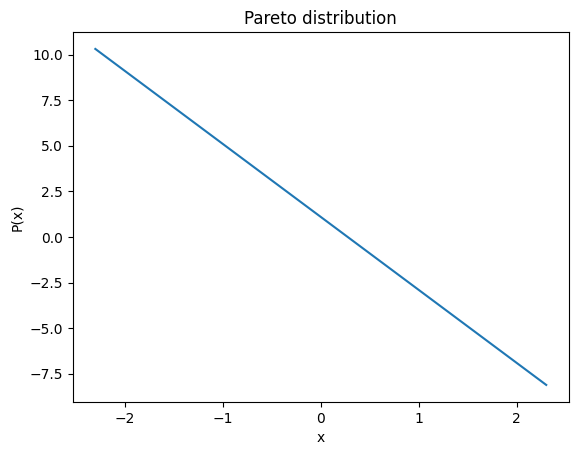

In [19]:
# Create the log-log plot
plt.plot(np.log(x),np.log(y))

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')

# Show the plot
plt.show()

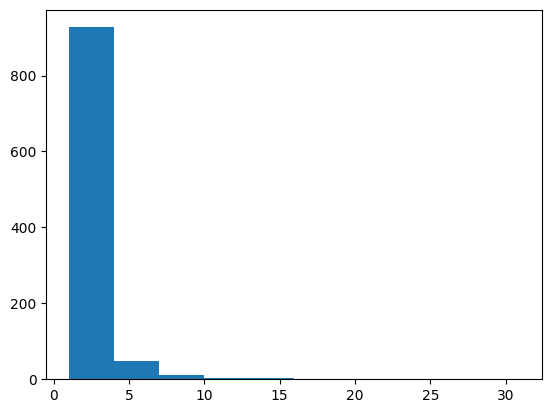

In [20]:
# Define the parameters of the Pareto distribution
alpha = 2
xm = 1

# Generate a set of random data from the Pareto distribution
x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

# Plotting
plt.hist(x)
plt.show()

In [21]:
# Fit a Pareto distribution to the data
params = stats.pareto.fit(x, floc=0)

# Create a Pareto distribution object with the fitted parameters
dist = stats.pareto(b=params[0], scale=params[2])

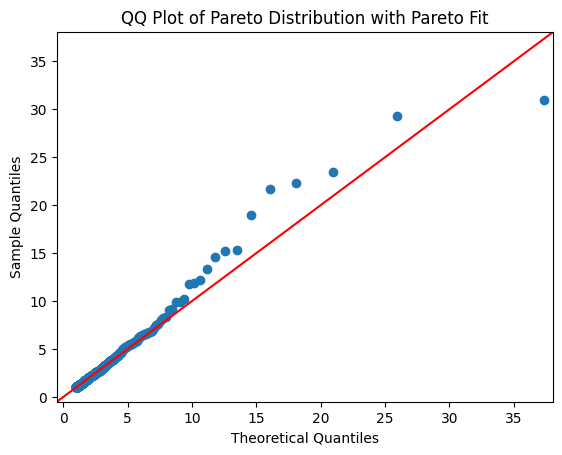

In [22]:
# Create a QQ plot of the data using the Pareto distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()